# 1. Fit a function on your bike data
Before we can start with interpreting our model, we need a model that fits
the data reasonably well. In more mathematical terms, that means we would like to have a model that has reasonable $R^2$ or accuraccy on the test set.

In [1]:
%ls -lhtr

total 1.2M
-rw-rw-r-- 1 1001 1002  237 May  5 16:09 README.md
-rw-rw-r-- 1 1001 1002  42K May  5 16:21 cervical.csv
-rw-rw-r-- 1 1001 1002  75K May  5 16:21 bike.csv
-rw-rw-r-- 1 1001 1002 349K May  5 16:21 ycomments.csv
-rw-rw-r-- 1 1001 1002 1.2K May  9 14:58 Dockerfile
-rw-rw-r-- 1 1001 1002 1.3K May  9 14:58 docker_buildls
-rw-r--r-- 1 1001 1002 335K May  9 17:49 Chapter-5-Model-Agnostic-Methods-Bike-Data.ipynb
-rw-r--r-- 1 root root 335K May  9 17:49 Chapter-5-Model-Agnostic-Methods-Cancer-Data.ipynb


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 

bike = pd.read_csv('cervical.csv').iloc[:, 1:]
bike.head()

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
1,15,1,14,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
2,34,1,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
3,52,5,16,4,1,37.0,1,3.0,0,0.0,0,0,0,1,1,Healthy
4,46,3,21,4,0,0.0,1,15.0,0,0.0,0,0,0,1,1,Healthy


In [19]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

For control purposes, we add a perfectly correlated feature and one random feature to the test set

In [20]:
def prepare_bike_data(collinear_feature = None):
    bike = pd.read_csv('cervical.csv').iloc[:, 1:]
    bike['randvec'] = np.random.rand(bike.shape[0])
    if not collinear_feature is None:
        bike['col_' + collinear_feature] = bike[collinear_feature]
    cat_cols = bike.select_dtypes('object').columns
    non_cat_cols = bike.columns[~bike.columns.isin(cat_cols)]
    enc = preprocessing.OrdinalEncoder()
    enc.fit(bike.loc[:, cat_cols])
    bike.loc[:, cat_cols] = enc.transform(bike.loc[:, cat_cols].values)
    return enc, bike

def prepare_x_y(df, y_col):
    X = df.loc[:, ~df.columns.isin([y_col])].values
    x_cols = df.loc[:, ~df.columns.isin([y_col])].columns
    y = df.loc[:, y_col].values
    return X, y, x_cols

ycol = 'Biopsy'
#bike = prepare_bike_data(collinear_feature='days_since_2011')
enc, bike = prepare_bike_data()
X, y, x_cols = prepare_x_y(bike, y_col=ycol)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.2, random_state=42)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.2, random_state=42)


In [33]:
np.mean(y)

0.9358974358974359

In [45]:
y = abs(y - 1)

In [65]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_depth=None, 
                           random_state=0, class_weight='balanced',
                           criterion='entropy', min_samples_split=20)
fold = 5
scores = cross_val_score(rf, X, y, cv=fold, scoring='roc_auc')
scores

array([0.65725579, 0.52964427, 0.41840768, 0.60284091, 0.60909091])

In [68]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, 
                           random_state=0, class_weight='balanced',
                           criterion='entropy', min_samples_split=20)
rf = rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [162]:
sp = 584
rf = RandomForestRegressor(n_estimators=100, max_depth=None, 
                           random_state=0, min_samples_split=10)
rf = rf.fit(X[:sp], y[:sp])
y_test_pred = rf.predict(X[sp:])
r2_score(y[sp:], y_test_pred)

0.5567879026658971

In [159]:
r2_score(y_test, y_test_pred)

0.8685883764656323

We note that we get a very impressive $R^2$ of 88%. Lets now use this model for interpretation

Feature ranking:
1. feature 15 (0.205566)
2. feature 0 (0.170878)
3. feature 2 (0.139397)
4. feature 7 (0.136744)
5. feature 1 (0.095836)
6. feature 3 (0.081546)
7. feature 5 (0.031502)
8. feature 6 (0.020302)
9. feature 9 (0.019231)
10. feature 11 (0.017974)
11. feature 10 (0.014775)
12. feature 12 (0.014762)
13. feature 14 (0.014688)
14. feature 4 (0.012930)
15. feature 8 (0.012202)
16. feature 13 (0.011666)


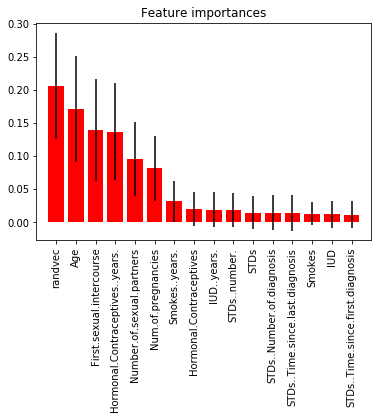

In [69]:
def plot_mdi_feature_importance(forest, x_cols):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    
    # Print the feature ranking
    print("Feature ranking:")
    
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    #plt.xticks(range(X.shape[1]), indices)
    plt.xticks(range(X.shape[1]), x_cols[indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()
plot_mdi_feature_importance(rf, x_cols)

Our standard method (mean decrease impurity) tells us that days since 2011 are the most important features. This hints at a trend, which is confirmed below.

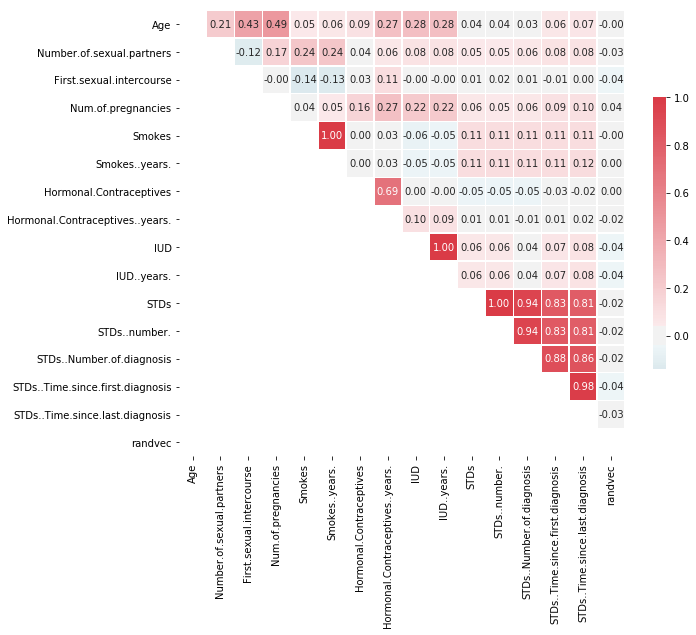

In [71]:
import seaborn as sns
def correlation_heatmap(df, method='spearman'):
    corr = df.corr(method=method).round(2)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.tril_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={'shrink': .5},
                annot=True, fmt='.2f')
    
correlation_heatmap(bike.drop(ycol, axis=1))

# 5.1.1 Partial Dependence Plot

In [72]:
y_col = 'cnt'
feature_names = ['temp', 'hum', 'windspeed', 'randvec', 
                 'days_since_2011', 'season', 'weathersit']
features = [bike.drop(y_col, axis=1).columns.get_loc(x) 
             for x in feature_names]

KeyError: "['cnt'] not found in axis"

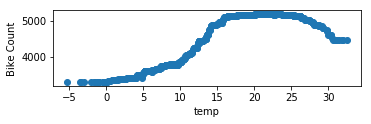

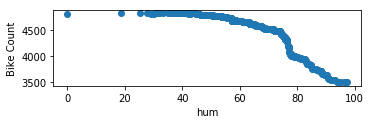

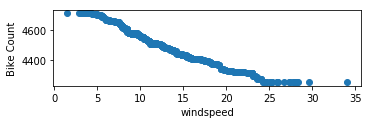

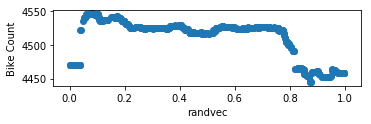

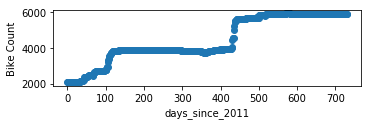

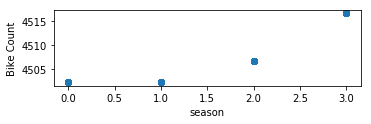

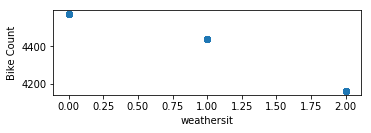

In [163]:
def pdp_plot(X, rf, feature_no, feature_name, y_name, multiplier=100):
    feat_sort_idx = X[:, feature_no].argsort()
    X = X[feat_sort_idx, :]
    n = X.shape[0]
    x_vals = np.vstack([X]*n)
    x_vals[:, feature_no] = np.repeat(X[:, feature_no], n)
    y_vals = rf.predict(x_vals)
    x_vals = np.mean(x_vals[:, feature_no].reshape((n, n)), axis=-1)
    y_vals = np.mean(y_vals.reshape(n, n), axis=-1)
    plt.xlabel(feature_name)
    plt.ylabel(y_name)
    return plt.scatter(x_vals, y_vals)

for i, _ in enumerate(feature_names):
    plt.figure(figsize=(5,10))
    plt.subplot(len(feature_names), 1, i+1)
    plt.tight_layout()
    pdp_plot(X, rf, features[i], feature_names[i], 
          y_name = 'Bike Count')

CPU times: user 46.6 s, sys: 1.22 s, total: 47.8 s
Wall time: 47.8 s


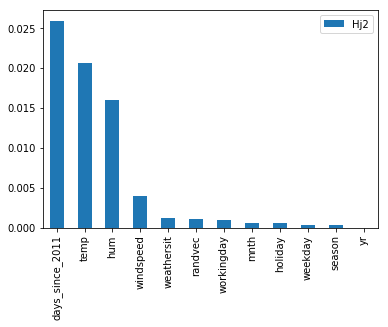

In [164]:
%%time
def lin_space_or_unique(x, lin_num):
    unique_elements = np.unique(np.sort(x))
    if unique_elements.shape[0] <= lin_num:
        X_vals = unique_elements
    else:
        X_vals = np.linspace(min(unique_elements), max(unique_elements), 
                             num=lin_num)
    return X_vals

def create_grid(X, remaining_features, lin_num):
    feature_lists = [lin_space_or_unique(X[:, idx], lin_num) for idx in 
                     remaining_features]
    x = np.meshgrid(*feature_lists)
    out = np.array([m.flatten() for m in x]).T
    return out

def pdp_fun(X_s, X, remaining_features, rf, subtract_mean=True):
    x_vals = np.vstack([X]*X_s.shape[0])
    X_s_repeat = np.repeat(X_s, X.shape[0], axis=0)
    X_s_repeat.shape
    x_vals[:, remaining_features] = X_s_repeat
    y_vals = rf.predict(x_vals)
    y_out = np.mean(y_vals.reshape(-1, X.shape[0]), axis=1)
    #x_vals = x_vals[:, remaining_features].reshape(X.shape[0], X_s.shape[0])
    if subtract_mean is True:
        y_out = y_out - np.mean(y_out)
    return X_grid, y_out

def friedman_Hjk2(rfeat, X, rf):
    _, PDjki = pdp_fun(X[:, rfeat], X, rfeat, rf)
    _, PDjk = pdp_fun(X[:, [rfeat[0]]], X, [rfeat[0]], rf)
    _, PDji = pdp_fun(X[:, [rfeat[1]]], X, [rfeat[1]], rf)              
    Hjk2 = np.power(PDjki - PDjk - PDji, 2).sum()/np.power(PDjik, 2).sum()
    return Hjk2

def friedman_Hj2(feat_no, X, rf):
    minus_j = np.r_[0:feat_no, (feat_no + 1):X.shape[1]]
    fbar = rf.predict(X)
    fbar = fbar - np.mean(fbar)
    _, PDj = pdp_fun(X[:, [feat_no]], X, [feat_no], rf)
    _, PDminusj = pdp_fun(X[:, minus_j], X, minus_j, rf)
    Hj2 = np.power(fbar - PDj - PDminusj, 2).sum()/np.power(fbar, 2).sum()
    return Hj2

def calc_and_plot_Hj2(X, rf, full_feature_list):
    Hj2_list = [friedman_Hj2(i, X, rf) for i, v in 
                enumerate(full_feature_list)]
    out_vals = pd.DataFrame(Hj2_list, index=full_feature_list, 
                            columns=['Hj2'])\
                 .sort_values('Hj2', ascending=False)
    out_vals.plot.bar()
    return out_vals

remaining_features = [6, 10]
lin_num = 10
X_grid = create_grid(X, remaining_features, lin_num = 10)
x_out, y_out = pdp_fun(X_grid, X, remaining_features, rf)
# to get the 'diagonal' for our features

full_feature_list = bike.drop('cnt', axis = 1).columns.tolist()
calc_and_plot_Hj2(X, rf, full_feature_list)

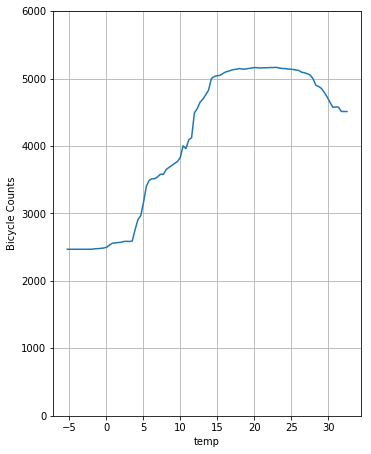

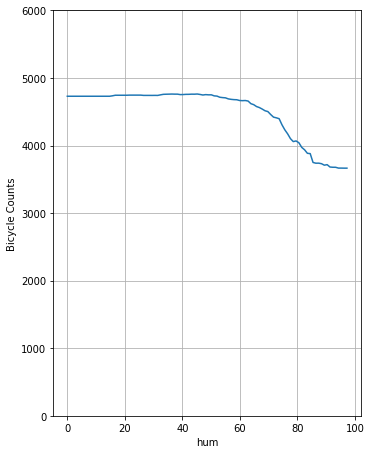

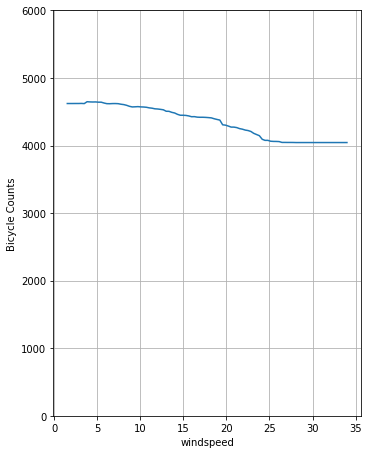

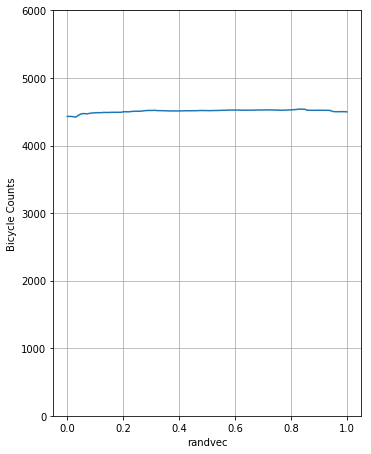

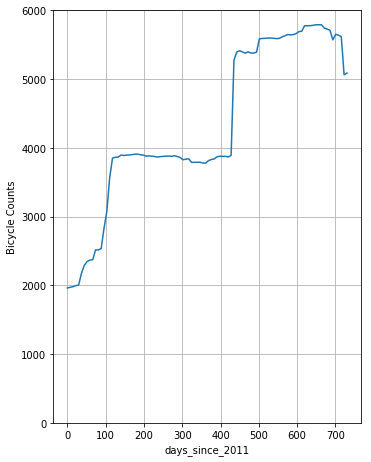

In [13]:
y_name = 'Bicycle Counts'
y_col = 'cnt'
feature_names = ['temp', 'hum', 'windspeed', 'randvec', 
                 'days_since_2011']
features = [bike.drop(y_col, axis=1).columns.get_loc(x) 
             for x in feature_names]

for i, v in enumerate(features):
    rfeat = [v]
    X_grid = create_grid(X, rfeat, lin_num = 100)
    x_out, y_out = pdp_fun(X_grid, X, rfeat, rf, False)
    plt.figure(figsize=(5,30))
    plt.subplot(len(feature_names), 1, i+1)
    plt.tight_layout()
    plt.xlabel(feature_names[i])
    plt.ylabel(y_name)
    plt.ylim((0, 6000))
    plt.grid(True)
    plt.plot(x_out, y_out)

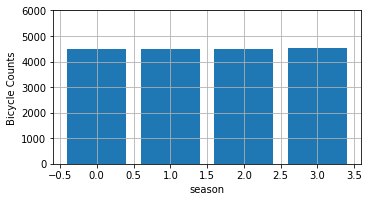

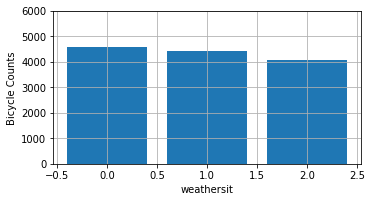

In [14]:
y_col = 'cnt'
feature_names = ['season', 'weathersit']
features = [bike.drop(y_col, axis=1).columns.get_loc(x) 
             for x in feature_names]

y_name = 'Bicycle Counts'
for i, v in enumerate(features[-2:]):
    rfeat = [v]
    X_grid = create_grid(X, rfeat, lin_num = 100)
    x_out, y_out = pdp_fun(X_grid, X, rfeat, rf, False)
    plt.figure(figsize=(5,5))
    plt.subplot(len(feature_names), 1, i+1)
    plt.tight_layout()
    plt.xlabel(feature_names[i])
    plt.ylabel(y_name)
    plt.ylim((0, 6000))
    plt.grid(True)
    plt.bar(x_out.flatten(), y_out)

In [243]:
feat_no = 10
minus_j = np.r_[0:feat_no, (feat_no + 1):X.shape[1]]
fbar = rf(X)
fbar = fbar - np.mean(fbar)
_, PDj = pdp_fun(X[:, [feat_no]], X, [feat_no], rf)
_, PDminusj = pdp_fun(X[:, minus_j], X, minus_j, rf)
Hj2 = np.sum(np.power(fbar - PDj - PDminusj ,2))/np.sum(np.power(fbar))
return Hj2

[6]

# Feature Importance - MDA/SFI/drop refit

In [73]:
def hbar_plot(x, err, xticks, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    bar_no = x.shape[0]
    plt.barh(range(bar_no), x, color='r', yerr=err, align='center')
    plt.xticks(range(bar_no), xticks)
    plt.xlim([-1, bar_no])
    plt.show()

In [74]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.base import clone
import copy

def hbar_plot(x, err, xticks, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    bar_no = x.shape[0]
    plt.barh(range(bar_no), x, color='lightblue', xerr=err, align='center')
    plt.yticks(range(bar_no), xticks)
    plt.gca().invert_yaxis()
    #plt.xlim([-1, bar_no])
    plt.show()
    
def permutate_and_score(clf, X_test, y_test, i, metric_fn, **kwargs):
    X_test_ = copy.deepcopy(X_test)
    np.random.shuffle(X_test_[i])
    y_pred = clf.predict(X_test_)
    return metric_fn(y_test, y_pred)

def drop_refit_and_score(clf, X_test, y_test, X_train, y_train, i, metric_fn):
    X_train_ = np.delete(copy.deepcopy(X_train), i, axis=1)
    X_test_ = np.delete(copy.deepcopy(X_test), i, axis=1)
    clf_ = clone(clf)
    clf_.random_state = 0
    clf_.fit(X_train_, y_train)
    y_pred = clf_.predict(X_test_)
    return metric_fn(y_test, y_pred)

def calc_stats(dscores, colnms):
    bias_corr = (dscores.shape[0]-1.5)**-.5
    summary = pd.DataFrame([np.mean(dscores, axis=0),
                            np.std(dscores, axis=0)*bias_corr],
                            columns=colnms,
                            index=['mean', 'std'])
    summary = summary.T.sort_values('mean', ascending=False)
    return summary

def calc_mda(clf, X, y, folds, metric_fn, score_fn):
    kf = KFold(n_splits=folds)
    kf.get_n_splits(X)
    decrease_scores = []
    for train, test in kf.split(X):
        clf_ = clone(clf)
        clf_.random_state = 0
        clf_.fit(X[train], y[train])
        y_pred = clf_.predict(X[test])
        base = metric_fn(y[test], y_pred)
        print(base)
        param_dict = {'clf':clf_, 'X_train': X[train], 'y_train': y[train],
                      'X_test': X[test], 'y_test':y[test],
                      'metric_fn': metric_fn}

        decrease_scores.append([base - score_fn(**dict(param_dict, i=i)) 
                                for i in range(X[train].shape[1])])
    return np.array(decrease_scores)


0.5773574251835121
0.5708333333333333
0.45121951219512196
0.565059144676979
0.584472049689441


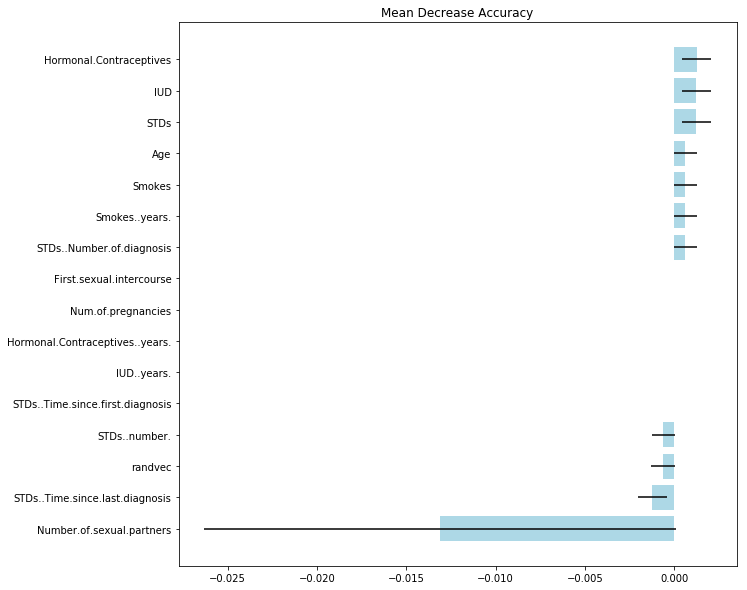

In [82]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=None, 
                           random_state=0, class_weight='balanced',
                           criterion='entropy', min_samples_split=30)
dscores = calc_mda(rf, X, y, folds=5, metric_fn=metrics.roc_auc_score, 
                   score_fn=permutate_and_score)
stats = calc_stats(dscores, x_cols)  
hbar_plot(stats['mean'], stats['std'], stats.index, 'Mean Decrease Accuracy')

In [72]:
pd.DataFrame(dscores, columns=x_cols)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011,randvec
0,0.047976,-0.029930,-0.042791,0.000833,-0.022746,-0.063676,0.017613,2.429040,-0.058567,-0.049434,-0.368113,-0.028671
1,0.006137,0.005656,0.018250,0.009867,0.008570,0.012267,0.044986,-0.054257,0.082286,0.023090,0.469430,-0.031292
2,0.138560,0.037670,-0.050820,0.086091,0.030328,-0.017770,-0.116688,2.541887,0.072111,-0.035575,-0.320551,0.024876
3,0.005990,0.002881,-0.005880,0.013912,0.021995,-0.004886,0.032794,0.117351,-0.000520,0.073252,0.203481,-0.002954
4,0.002648,0.000506,-0.004260,0.005527,-0.004615,-0.004750,-0.000011,0.464108,-0.017094,0.036448,-0.055872,-0.008028


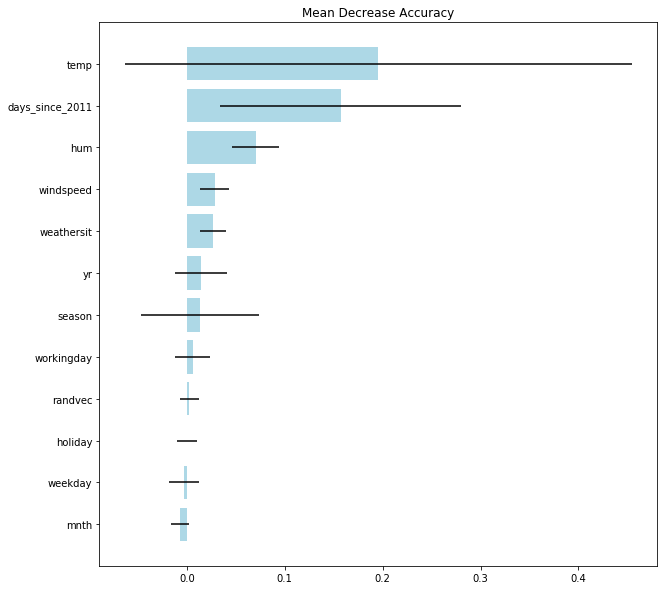

In [82]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None, 
                           random_state=0)
dscores = calc_mda(rf, X, y, folds=10, metric_fn=metrics.r2_score, 
                   score_fn=drop_refit_and_score)
stats = calc_stats(dscores, x_cols)  
hbar_plot(stats['median'], stats['std'], stats.index, 'Mean Decrease Accuracy')

In [80]:
stats.assign(ratio = lambda x:x['median']/x['std'])\
     .sort_values('ratio', ascending=False)

,median,std,ratio
windspeed,0.023090,0.024472,0.943526
weekday,0.008570,0.010116,0.847213
temp,0.464108,0.611679,0.758744
holiday,0.009867,0.016957,0.581860
weathersit,0.017613,0.031108,0.566200
yr,0.002881,0.011462,0.251315
season,0.006137,0.027750,0.221162
hum,-0.000520,0.028755,-0.018092
days_since_2011,-0.055872,0.169390,-0.329844
workingday,-0.004886,0.013784,-0.354463


In [81]:
pd.DataFrame(dscores, columns = x_cols)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,days_since_2011,randvec
0,0.047976,-0.029930,-0.042791,0.000833,-0.022746,-0.063676,0.017613,2.429040,-0.058567,-0.049434,-0.368113,-0.028671
1,0.006137,0.005656,0.018250,0.009867,0.008570,0.012267,0.044986,-0.054257,0.082286,0.023090,0.469430,-0.031292
2,0.138560,0.037670,-0.050820,0.086091,0.030328,-0.017770,-0.116688,2.541887,0.072111,-0.035575,-0.320551,0.024876
3,0.005990,0.002881,-0.005880,0.013912,0.021995,-0.004886,0.032794,0.117351,-0.000520,0.073252,0.203481,-0.002954
4,0.002648,0.000506,-0.004260,0.005527,-0.004615,-0.004750,-0.000011,0.464108,-0.017094,0.036448,-0.055872,-0.008028


In [35]:
dscores

In [22]:
def fun(x, z, **kwargs):
    print(x)
    
pdict = {'x': 3, 'y':5, 'z':30}
pdict.update({'x': 5})
fun(**pdict)
pdict.update({'k': 2})
fun(**pdict)

5
5


In [23]:
pdict


{'k': 2, 'x': 5, 'y': 5, 'z': 30}

In [ ]:
def fun(*args, **kwargs):
    